# Определение закономерности успешности игры


Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Вам нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы
планируете кампанию на 2017-й. Нужно отработать принцип работы с данными.
Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же
2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating
Board) — это ассоциация, определяющая возрастной рейтинг компьютерных
игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную
категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для
подростков».



**Описание данных**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating
Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает
им подходящую возрастную категорию.

**План работы**
- Подготовьте данные.
Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили
тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или
почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой
пользователей. Отдельно разберите это значение и опишите, как его
обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный
столбец.

- Проведите исследовательский анализ данных.
Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все
периоды?
Посмотрите, как менялись продажи по платформам. Выберите платформы с
наибольшими суммарными продажами и постройте распределение по годам.
За какой характерный срок появляются новые и исчезают старые платформы?
Возьмите данные за соответствующий актуальный период. Актуальный
период определите самостоятельно в результате исследования предыдущих
вопросов. Основной фактор — эти данные помогут построить прогноз на 2017
год.
Не учитывайте в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберите
несколько потенциально прибыльных платформ.
Постройте график «ящик с усами» по глобальным продажам игр в разбивке по
платформам. Опишите результат.
Посмотрите, как влияют на продажи внутри одной популярной платформы
отзывы пользователей и критиков. Постройте диаграмму рассеяния и
посчитайте корреляцию между отзывами и продажами. Сформулируйте
выводы.
Соотнесите выводы с продажами игр на других платформах.
Посмотрите на общее распределение игр по жанрам. Что можно сказать о
самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими
продажами?
- Составьте портрет пользователя каждого региона.
Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясните разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?
- Проверьте гипотезы.
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-
игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.
Шаг 6. Напишите общий вывод

## Изучение данных из файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('C:/Users/paulo/Desktop/Сборный проект1/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#смотрю общую инф-ю о дф
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Вывод

- необходимо исправить название столбцов
- замена типа данных в столбцах Year_of_Release, Critic_Score
- заполнение пропусков в столбцах Critic_Score, User_Score медианой/средним
- в столбце User_Score имеется значение 'tbd'. Его можно приравнять к NaN и сделать замену на среднее значение
- в столбце Rating пропуски означают, что данный продукт для всех возрастных категорий
- пропуски в столбце Year_of_Release заменю на 0
- удалю 2 строчки без названия игр

## Подготовка данных

In [5]:
#поиск явных дубликатов
games.duplicated().sum()

0

In [6]:
#замена названий столбцов
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 
                 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [7]:
#думаю удалить две строчки, с рядом отсутствующих данных
display(games[games.name.isna()])
print('Доля безликих строчек в общем ДФ:', len(games[games.name.isna()])/len(games))
games = games.dropna(subset=['name'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Доля безликих строчек в общем ДФ: 0.00011965300628178283


In [8]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [9]:
#заполнение пропусков в столбце year_of_release и изменение типа данных
games.year_of_release = games.year_of_release.fillna(games.groupby('genre')['year_of_release'].transform('median'))
games.year_of_release = games.year_of_release.astype(int)

In [10]:
#значение tbd можно приравнять к Nan
games.user_score = games.user_score.replace('tbd', np.nan)
games.user_score = games.user_score.astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
#заполнение пропусков в столбце critic_score
games.critic_score = games.critic_score.fillna(-1)

#заполнение пропусков в столбце user_score
games.user_score = games.user_score.fillna(-1)

#заполнение пропусков в столбце rating
games.rating = games.rating.fillna('no_rating')

In [12]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no_rating
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no_rating


In [13]:
#суммарные продажи во всех регионах
games['sum_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

### Вывод

- заменил название столбцов в соответствии с правилами хорошего тона
- заменил тип данных там, где он необходим
- заполнил пропуски в столбцах user_score, critic_score, rating
- удалил 2 безликие строчки

## Исследовательский анализ данных

In [14]:
games.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


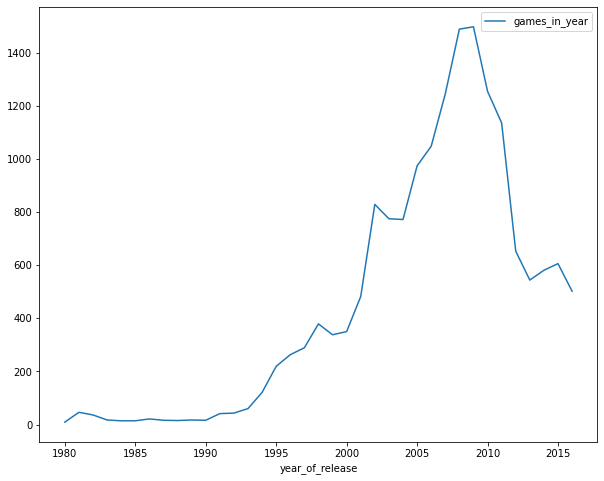

In [15]:
#Количество выпущенных игр в разные годы
count_in_year = games.pivot_table(index='year_of_release', values='name', aggfunc='count').reset_index()
count_in_year.columns=['year_of_release', 'games_in_year']
count_in_year.plot(x='year_of_release', y='games_in_year', figsize=(10,8))
plt.show()

Видно, что максимальное количество выпущенных игр приходится на 2007-2009 года.

In [16]:
#Суммарные продажи по платформам
sales_of_platform = (games.pivot_table(index=['platform'], values='sum_sales', aggfunc='sum').reset_index()
                     .sort_values(by='sum_sales', ascending=False))
sales_of_platform.head(10)

,platform,sum_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Можно выделить явных лидеров по суммарным продажам: PS2, X360, Wii, PS3, DS, PS.  

In [17]:
#Топ-10 платформ по суммарным продажам
list_top_platform = sales_of_platform[:10]['platform'].tolist()
list_top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

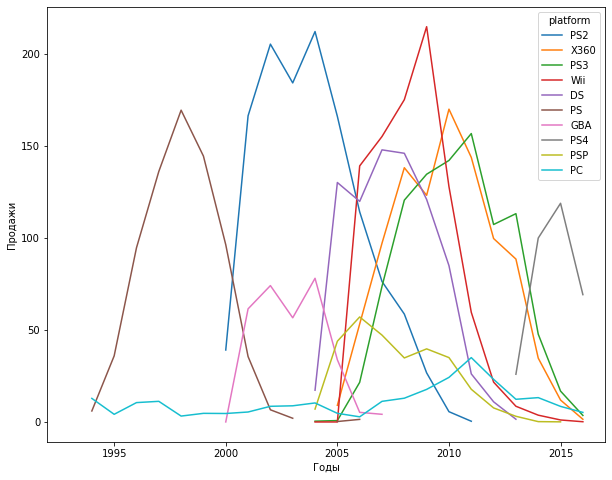

In [18]:
#Графики изменения продаж для топ-10 платформам
sales_of_platform = games.pivot_table(index=['year_of_release'], columns='platform', values='sum_sales', aggfunc='sum').reset_index()
#display(sales_of_platform)
sales_of_platform.plot(x='year_of_release', y=list_top_platform, figsize=(10,8), xlim=(1992,2017))
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

In [19]:
#считаю средний жизненный цикл платформы
average_of_platform = games.pivot_table(index='platform', values='year_of_release', aggfunc=['max', 'min']).reset_index()
average_of_platform.columns = ['platform', 'start', 'finish']
average_of_platform['duration'] = average_of_platform['start'] - average_of_platform['finish']
display(average_of_platform.head(10))

print('Средний жизненный цикл платформы составляет:', average_of_platform.duration.mean())

,platform,start,finish,duration
0,2600,2009,1980,29
1,3DO,1995,1994,1
2,3DS,2016,2005,11
3,DC,2008,1998,10
4,DS,2013,1985,28
5,GB,2004,1988,16
6,GBA,2009,2000,9
7,GC,2009,2001,8
8,GEN,1994,1990,4
9,GG,1992,1992,0


Средний жизненный цикл платформы составляет: 9.35483870967742


**По приведенным данным за актуальный период возьму 2013-2016 годы.** 

In [20]:
#делаю срез по годам с 2013 по 2016
segment_games = games.copy()
segment_games = segment_games.query('2013 <= year_of_release <= 2016').reset_index(drop=True)
#segment_games

Какие платформы лидируют по продажам, растут или падают?

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


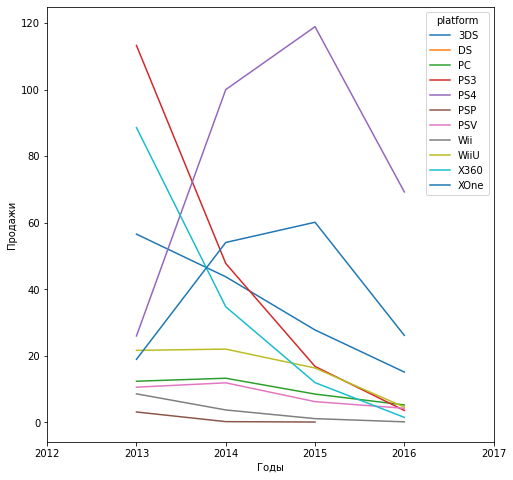

In [21]:
#Графики изменения продаж для платформ в период 2013-2016 годов
seg_sales_of_platform = segment_games.pivot_table(index=['year_of_release'], columns='platform', values='sum_sales', aggfunc='sum').reset_index()
display(seg_sales_of_platform)

seg_sales_of_platform.plot(x='year_of_release', figsize=(8,8), xlim=(2012,2017))
plt.xlabel('Годы')
plt.ylabel('Продажи')
plt.show()

In [22]:
#Лидеры по продажам за 2010-2016
seg_sum_sales = (segment_games.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
                 .reset_index().sort_values(by='sum_sales', ascending=False))
seg_sum_sales

,platform,sum_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


У лидеров продаж X360, Wii, PS3, DS наблюдается падение продаж к 2016 году.

In [23]:
segment_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


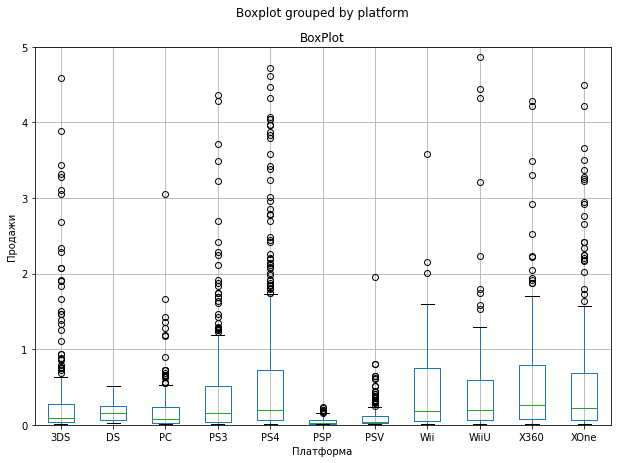

In [24]:
#«Ящик с усами» по глобальным продажам игр в разбивке по платформам
segment_games.boxplot(column=['sum_sales'], by=['platform'], figsize=(10,7))
plt.ylim(0,5)
plt.title('BoxPlot')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

По данным диаграммы размаха видно, что распределение продаж смещено вправо. Предположу, что пик продаж случается сразу после выхода какой-то игры, а после идет снижение продаж. 

**Влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков.**

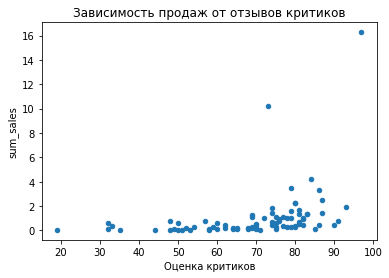

Корреляция между отзывами критиков и продажами для X360: 0.3503445460228664


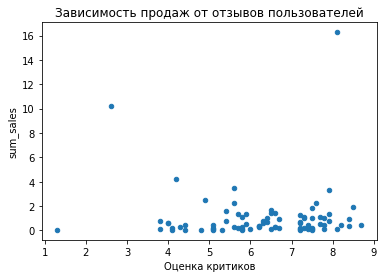

Корреляция между отзывами пользователей и продажами для X360: -0.006238179532306317


In [25]:
#проверим платформу X360
score_x360 = segment_games.query('platform == "X360" and critic_score > 0 and user_score > 0')
score_x360.plot(kind='scatter', x='critic_score', y='sum_sales', sharex=False)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами критиков и продажами для X360:', score_x360['critic_score'].corr(score_x360['sum_sales']))

score_x360.plot(kind='scatter', x='user_score', y='sum_sales')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами пользователей и продажами для X360:', score_x360['user_score'].corr(score_x360['sum_sales']))

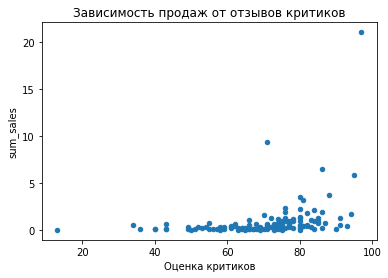

Корреляция между отзывами критиков и продажами для PS3: 0.33380663565061736


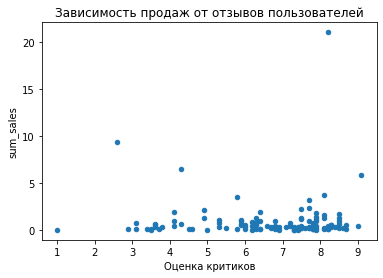

Корреляция между отзывами пользователей и продажами для PS3: 0.02269094327112414


In [26]:
#проверим платформу PS3
score_ps3 = segment_games.query('platform == "PS3" and critic_score > 0 and user_score > 0')
score_ps3.plot(kind='scatter', x='critic_score', y='sum_sales', sharex=False)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами критиков и продажами для PS3:', score_ps3['critic_score'].corr(score_ps3['sum_sales']))

score_ps3.plot(kind='scatter', x='user_score', y='sum_sales')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами пользователей и продажами для PS3:', score_ps3['user_score'].corr(score_ps3['sum_sales']))

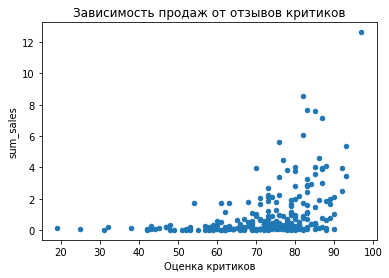

Корреляция между отзывами критиков и продажами для PS4: 0.40589480145836687


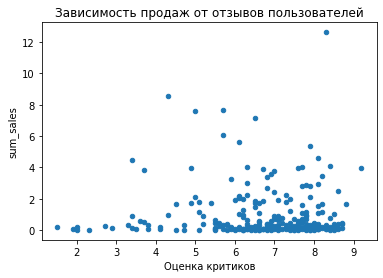

Корреляция между отзывами пользователей и продажами для PS4: -0.03362497596528878


In [27]:
#проверим платформу PS4
score_ps4 = segment_games.query('platform == "PS4" and critic_score > 0 and user_score > 0')
score_ps4.plot(kind='scatter', x='critic_score', y='sum_sales', sharex=False)
plt.title('Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами критиков и продажами для PS4:', score_ps4['critic_score'].corr(score_ps4['sum_sales']))

score_ps4.plot(kind='scatter', x='user_score', y='sum_sales')
plt.title('Зависимость продаж от отзывов пользователей')
plt.xlabel('Оценка критиков')
#plt.уlabel('Продажи')
plt.show()
print('Корреляция между отзывами пользователей и продажами для PS4:', score_ps4['user_score'].corr(score_ps4['sum_sales']))

По данным диаграммам X360 и PS3 нельзя сказать, что оценка пользователей и критиков явно влияет на продажи. Но по зависимости продаж от отзывов критиков для платформы PS4 видно, что хорошие оценки критиков положительно влияют на продажи. 


In [29]:
#общее распределение игр по жанрам
games_of_genre = (segment_games.pivot_table(index='genre', values='name', aggfunc='count').reset_index()
                  .sort_values(by='name', ascending=False))
games_of_genre

,genre,name
0,Action,766
7,Role-Playing,292
1,Adventure,245
10,Sports,214
8,Shooter,187
3,Misc,155
6,Racing,85
2,Fighting,80
4,Platform,74
9,Simulation,62


In [30]:
#самые прибыльные жанры
(segment_games.pivot_table(index='genre', values='sum_sales', aggfunc='median').reset_index()
 .sort_values(by='sum_sales', ascending=False))

,genre,sum_sales
8,Shooter,0.450
10,Sports,0.240
4,Platform,0.225
7,Role-Playing,0.125
2,Fighting,0.125
6,Racing,0.120
0,Action,0.110
9,Simulation,0.100
3,Misc,0.100
11,Strategy,0.080


Большое количество выпускаемых игр соответствует таким жанрам, как Action, Misc, Sports, Role-Playing, Adventure, Shooter. Среди них выделяется жанр Action, почти в 3 раза опережающий по количеству игр последующую строчку.

Топ-5 самых прибыльных жанров: Shooter, Platform, Sports, Fighting, Racing, Role-Playing. Shooter (по-русски стрелялка) уверенно закрепился в лидерах по прибыли.

### Вывод

- выбрал актуальный период для анализа 2017 года
- рассмотрел потенциально прибыльные платформы
- оценил зависимость продаж от отзывов
- рассмотрел распределение игр по жанрам, а также прибыль по жанрам

## Портрет пользователя каждого региона

In [31]:
segment_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


,platform,na_sales,sum_sales
4,PS4,108.74,314.14
10,XOne,93.12,159.32
9,X360,81.66,136.80
3,PS3,63.50,181.43
0,3DS,38.20,143.25


,platform,eu_sales,sum_sales
4,PS4,141.09,314.14
3,PS3,67.81,181.43
10,XOne,51.59,159.32
9,X360,42.52,136.80
0,3DS,30.96,143.25


,platform,jp_sales,sum_sales
0,3DS,67.81,143.25
3,PS3,23.35,181.43
6,PSV,18.59,32.99
4,PS4,15.96,314.14
8,WiiU,10.88,64.63


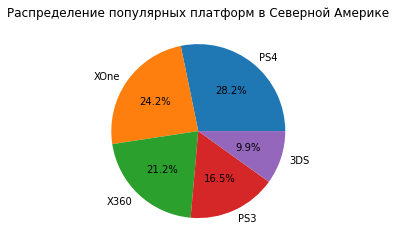

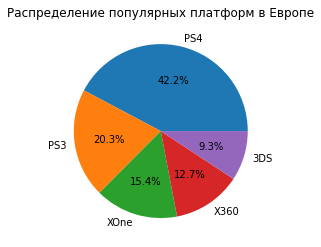

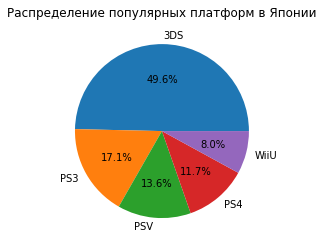

In [32]:
#Самые популярные платформы (топ-5) для пользователя каждого региона
top_na_sales = (segment_games.pivot_table(index='platform', values=['na_sales', 'sum_sales'], aggfunc='sum').reset_index()
                .sort_values(by='na_sales', ascending=False).head())
display(top_na_sales)
    
top_eu_sales = (segment_games.pivot_table(index='platform', values=['eu_sales', 'sum_sales'], aggfunc='sum').reset_index()
                .sort_values(by='eu_sales', ascending=False).head())
display(top_eu_sales)

top_jp_sales = (segment_games.pivot_table(index='platform', values=['jp_sales', 'sum_sales'], aggfunc='sum').reset_index()
                .sort_values(by='jp_sales', ascending=False).head())
display(top_jp_sales)

fig1, ax1 = plt.subplots()
ax1.pie(top_na_sales.na_sales, labels=top_na_sales.platform, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Северной Америке')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(top_eu_sales.eu_sales, labels=top_eu_sales.platform, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Европе')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(top_jp_sales.jp_sales, labels=top_jp_sales.platform, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Японии')
plt.show()

Видно, что в регионах популярностью пользуются разные платформы: в Северной Америке и Европе - PS4, в Японии - 3DS. 

In [33]:
#Доля продаж
ratio_of_sales_na = top_na_sales['na_sales'].sum() / top_na_sales['sum_sales'].sum()
print('Доля продаж в Северной Америке:', ratio_of_sales_na)

ratio_of_sales_eu = top_eu_sales['eu_sales'].sum() / top_eu_sales['sum_sales'].sum()
print('Доля продаж в Европе:', ratio_of_sales_eu)

ratio_of_sales_jp = top_jp_sales['jp_sales'].sum() / top_jp_sales['sum_sales'].sum()
print('Доля продаж в Японии:', ratio_of_sales_jp)

Доля продаж в Северной Америке: 0.41202644019937157
Доля продаж в Европе: 0.35721008834791607
Доля продаж в Японии: 0.1854733583183969


Видно, что в Северной Америке осуществляется почти половина продаж. Это ожидаемо, т.к. большинство геймеров на разных соревнованиях представляют Америку.

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


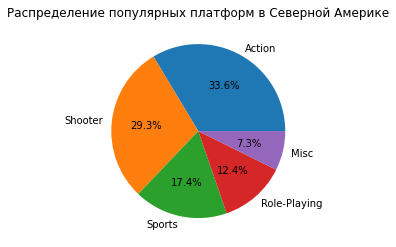

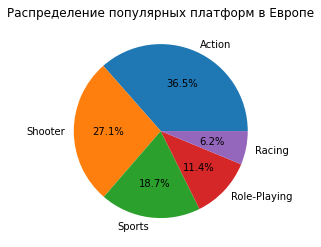

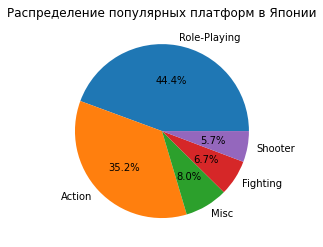

In [34]:
#Самые популярные жанры (топ-5) для пользоватлеля каждого региона
top_na_genre = (segment_games.pivot_table(index='genre', values=['na_sales'], aggfunc='sum').reset_index()
              .sort_values(by='na_sales', ascending=False).head())
display(top_na_genre)

top_eu_genre = (segment_games.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum').reset_index()
              .sort_values(by='eu_sales', ascending=False).head())
display(top_eu_genre)

top_jp_genre = (segment_games.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum').reset_index()
              .sort_values(by='jp_sales', ascending=False).head())
display(top_jp_genre)

fig1, ax1 = plt.subplots()
ax1.pie(top_na_genre.na_sales, labels=top_na_genre.genre, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Северной Америке')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(top_eu_genre.eu_sales, labels=top_eu_genre.genre, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Европе')
plt.show()

fig1, ax1 = plt.subplots()
ax1.pie(top_jp_genre.jp_sales, labels=top_jp_genre.genre, autopct='%1.1f%%')
plt.title('Распределение популярных платформ в Японии')
plt.show()   

У пользователей из Северной Америке и Европы выбор по жанрам практически одинаков. Популярностью в этих регионах пользуется Action.

На первом месте в Японии стоит Role-Playing, хотя Action занимает вторую строчку. 

na_sales


platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64

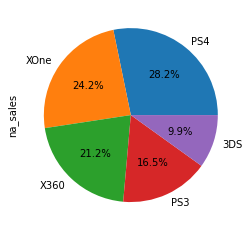

eu_sales


platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

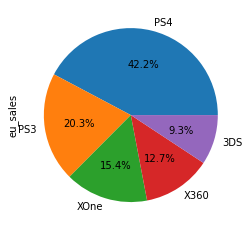

jp_sales


platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64

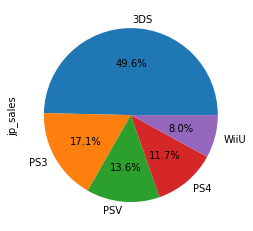

In [42]:
#Код ревьюера
regions_list = ['na_sales', 'eu_sales', 'jp_sales']

for value in regions_list:
  print(value)
  display(segment_games.groupby('platform')[value].sum()\
      .sort_values(ascending = False).head(5))
  segment_games.groupby('platform')[value].sum()\
      .sort_values(ascending = False).head(5).plot(kind = 'pie', autopct = '%.1f%%')
  plt.show()

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [35]:
segment_games.rating.value_counts()

no_rating    977
M            369
T            333
E            302
E10+         252
Name: rating, dtype: int64

In [36]:
segment_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [37]:
#в Северной Америке
na_rating = (segment_games.pivot_table(index='rating', values=['na_sales'], aggfunc='sum').reset_index()
              .sort_values(by='na_sales', ascending=False).head())
display(na_rating)

#в Европе
eu_rating = (segment_games.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum').reset_index()
              .sort_values(by='eu_sales', ascending=False).head())
display(eu_rating)
        
#в Японии
jp_rating = (segment_games.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum').reset_index()
              .sort_values(by='jp_sales', ascending=False).head())
display(jp_rating)

,rating,na_sales
2,M,165.21
4,no_rating,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


,rating,eu_sales
2,M,145.32
0,E,83.36
4,no_rating,78.91
1,E10+,42.69
3,T,41.95


,rating,jp_sales
4,no_rating,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


Видно, что продажи игр для взрослых в Северной Америке и Европе преобладают. В Японии наоборот, они занимают 4ое место.

Следует отметить, что игры без рейтинга занимают значительную долю в регионах.

В Японии на первом месте по продажам - "игры без рейтинга".  

### Вывод
- рассмотрел топ-5 платформ. Нашел долю в продажах
- рассмотрел топ-5 жанров. Вкус пользователей из Японии отличается
- рассмотрел влияние рейтинга ESRB на продажи

## Проверка гипотез

### Гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые"

Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны"

Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не равны"

In [38]:
segment_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,no_rating,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,no_rating,14.60
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


In [39]:
#Проверка гипотезы о равенстве 2-х генеральных совокупностей 
platform_xone = segment_games.query('platform == "XOne" and user_score > 0')
platform_pc = segment_games.query('platform == "PC" and user_score > 0')
alpha = .01
# platform_pc.info()
# platform_xone.info()

#Выборки у платформ разные, поэтому возьму equal_var=False
results = st.ttest_ind(platform_xone['user_score'], platform_pc['user_score'])#, equal_var=False)
print('p-значение равно', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение равно 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


По полученным данным можно сказать, что вероятность равенства средних оценок пользователей для плафторм XOne и PC велика.

### Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные"

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны"

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports не равны"

In [40]:
#Проверка гипотезы о равенстве 2-х генеральных совокупностей 
genre_action = segment_games.query('genre == "Action" and user_score > 0')
genre_sports = segment_games.query('genre == "Sports" and user_score > 0')
alpha = .01

#genre_action.info()
#genre_sports.info()

#Выборки у жанров разные. Буду брать equal_var=False

results2 = st.ttest_ind(genre_action['user_score'], genre_sports['user_score'], equal_var=False)
print('p-значение равно', results2.pvalue)

if results2.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение равно 1.4460039700704315e-20
Отвергаем нулевую гипотезу


По результатам скажу, что гипотеза: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" - подтвердилась. 

## Общий вывод

- По приведенным данным выбрал актуальный период: 2010-2016 годы.

- У лидеров продаж X360, Wii, PS3, DS наблюдается падение продаж к 2016 году.

- Проанализировал 3 платформы: PS3, PS4, X360. Оценка пользователей и критиков явно не влияет на продажи. Но для PS4 зависимость продаж от оценки критиков заметна.

- Большое количество выпускаемых игр соответствует таким жанрам, как Action, Misc, Sports, Role-Playing, Adventure, Shooter. Среди них выделяется жанр Action, почти в 3 раза опережающий по количеству игр последующий жанр.

- Топ-5 самых прибыльных жанров: Shooter, Platform, Sports, Fighting, Racing, Role-Playing. Shooter (по-русски стрелялка) уверенно закрепился в лидерах по прибыли.

- В регионах популярностью пользуются разные платформы: в Северной Америке и Европе - PS4, в Японии - 3DS. 

- По данным видно, что в Северной Америке осуществляется почти половина продаж.

- У пользователей из Северной Америке и Европы выбор по жанрам практически одинаков. Популярностью в этих регионах пользуется Action. На первом месте в Японии стоит Role-Playing, хотя Action занимает вторую строчку. 

- Видно, что продажи игр для взрослых в Северной Америке и Европе преобладают. В Японии наоборот, они занимают 4ое место. 
Следует отметить, что игры без рейтинга занимают значительную долю в регионах. В Японии на первом месте по продажам - "игры без рейтинга". 

**В заключении скажу, для успеха игры необходимо: жанр - Action/Shooter, локация - Северная Америка.**